### Import Libraries

In [32]:
import pandas as pd 
import seaborn as sns 
import matplotlib as plt

from autoviz import AutoViz_Class
%matplotlib inline
Av = AutoViz_Class()

### Data Assesment and Cleaning

In [33]:
df = pd.read_csv('./ecommerce_lite.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572300,22423,REGENCY CAKESTAND 3 TIER,2.0,10/23/2011 14:40,12.75,18005.0,United Kingdom
1,568984,22505,MEMO BOARD COTTAGE DESIGN,1.0,9/29/2011 15:57,4.95,17813.0,United Kingdom
2,573333,84997D,CHILDRENS CUTLERY POLKADOT PINK,4.0,10/30/2011 11:34,4.15,12483.0,Sweden
3,551988,22673,FRENCH GARDEN SIGN BLUE METAL,12.0,5/5/2011 15:08,1.25,12576.0,Poland
4,572070,21137,BLACK RECORD COVER FRAME,24.0,10/20/2011 13:37,3.39,15587.0,United Kingdom
...,...,...,...,...,...,...,...,...
39406,565426,21791,VINTAGE HEADS AND TAILS CARD GAME,1.0,9/4/2011 12:41,1.25,12851.0,United Kingdom
39407,574043,23144,ZINC T-LIGHT HOLDER STARS SMALL,10.0,11/2/2011 13:13,0.83,16367.0,United Kingdom
39408,574896,23317,BLUE REFECTORY CLOCK,1.0,11/7/2011 14:51,9.95,17014.0,United Kingdom
39409,574091,16156S,WRAP PINK FAIRY CAKES,25.0,11/3/2011 9:20,0.42,17086.0,United Kingdom


In [34]:
df[['Quantity', 'CustomerID']] = df[['Quantity', 'CustomerID']].astype('int64')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39411 entries, 0 to 39410
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    39411 non-null  int64  
 1   StockCode    39411 non-null  object 
 2   Description  39411 non-null  object 
 3   Quantity     39411 non-null  int64  
 4   InvoiceDate  39411 non-null  object 
 5   UnitPrice    39411 non-null  float64
 6   CustomerID   39411 non-null  int64  
 7   Country      39411 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.4+ MB


In [36]:
df.shape

(39411, 8)

In [37]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [38]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [39]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572300,22423,REGENCY CAKESTAND 3 TIER,2,2011-10-23 14:40:00,12.75,18005,United Kingdom
1,568984,22505,MEMO BOARD COTTAGE DESIGN,1,2011-09-29 15:57:00,4.95,17813,United Kingdom
2,573333,84997D,CHILDRENS CUTLERY POLKADOT PINK,4,2011-10-30 11:34:00,4.15,12483,Sweden
3,551988,22673,FRENCH GARDEN SIGN BLUE METAL,12,2011-05-05 15:08:00,1.25,12576,Poland
4,572070,21137,BLACK RECORD COVER FRAME,24,2011-10-20 13:37:00,3.39,15587,United Kingdom
...,...,...,...,...,...,...,...,...
39406,565426,21791,VINTAGE HEADS AND TAILS CARD GAME,1,2011-09-04 12:41:00,1.25,12851,United Kingdom
39407,574043,23144,ZINC T-LIGHT HOLDER STARS SMALL,10,2011-11-02 13:13:00,0.83,16367,United Kingdom
39408,574896,23317,BLUE REFECTORY CLOCK,1,2011-11-07 14:51:00,9.95,17014,United Kingdom
39409,574091,16156S,WRAP PINK FAIRY CAKES,25,2011-11-03 09:20:00,0.42,17086,United Kingdom


### Customer Analysis

In [40]:
import matplotlib.pyplot as plt

# Calculate the total spending for each customer
df['TotalSpending'] = df['Quantity'] * df['UnitPrice']

# Customer Demographics: Distribution of customers across countries
customer_demographics = df.groupby('Country')['CustomerID'].nunique().reset_index()
customer_demographics = customer_demographics.rename(columns={'CustomerID': 'CustomerCount'})

# Sort countries by customer count in descending order
customer_demographics = customer_demographics.sort_values(by='CustomerCount', ascending=False)

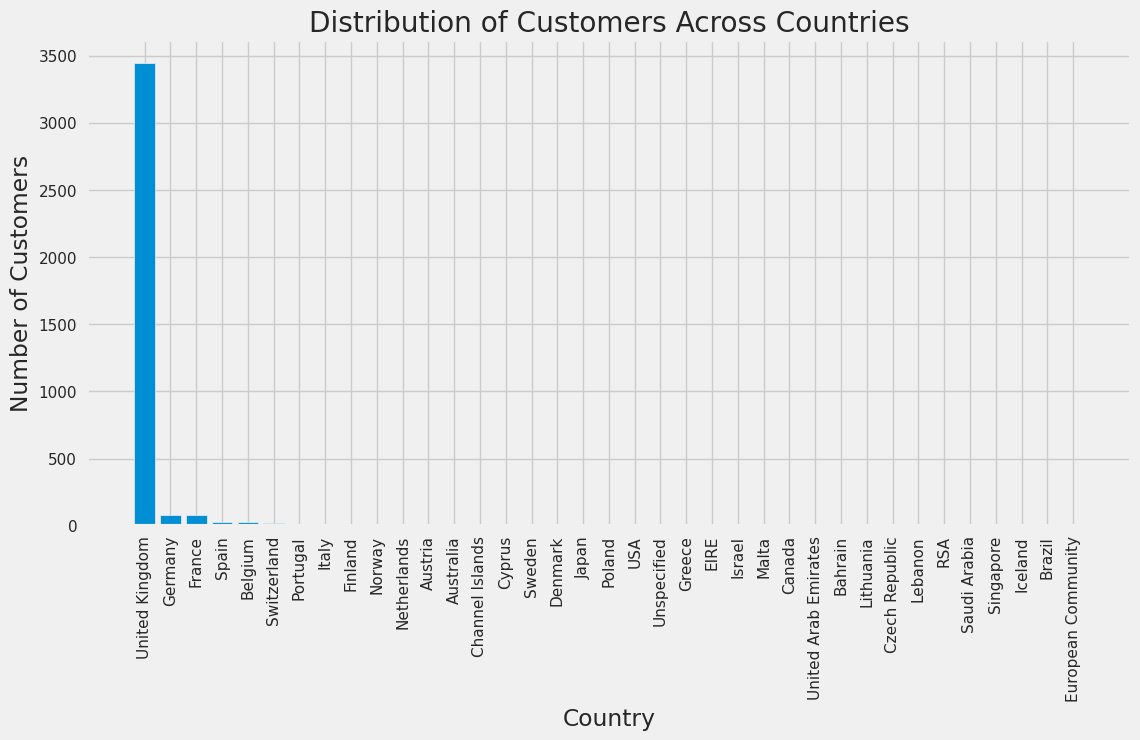

In [41]:
# Plot the distribution of customers across countries
plt.figure(figsize=(12, 6))
plt.bar(customer_demographics['Country'], customer_demographics['CustomerCount'])
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Countries')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [42]:
# Customer Purchase Behavior: Frequency and Monetary Value
customer_purchase_behavior = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',                 # Frequency (number of unique invoices)
    'TotalSpending': 'sum'                  # Monetary Value (total spending)
}).reset_index()

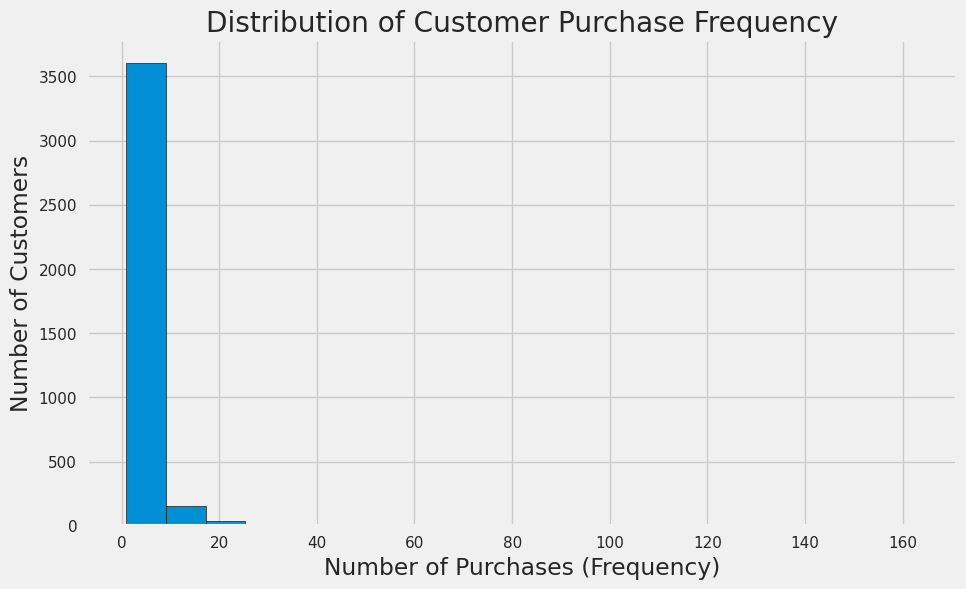

In [43]:
# Plot the distribution of customer frequency
plt.figure(figsize=(10, 6))
plt.hist(customer_purchase_behavior['InvoiceNo'], bins=20, edgecolor='k')
plt.xlabel('Number of Purchases (Frequency)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Purchase Frequency')
plt.grid(True)
plt.show()

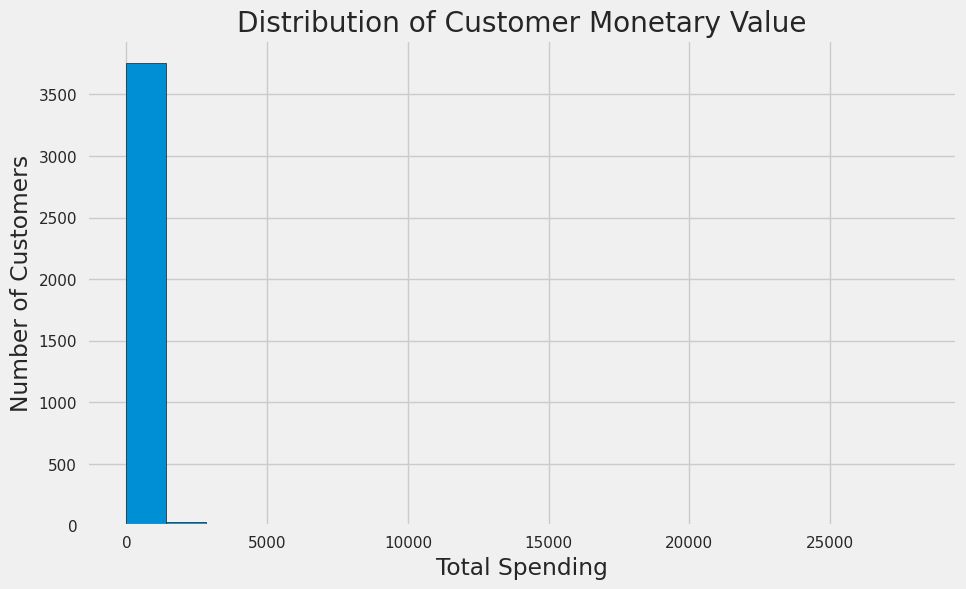

In [44]:
# Plot the distribution of customer monetary value (total spending)
plt.figure(figsize=(10, 6))
plt.hist(customer_purchase_behavior['TotalSpending'], bins=20, edgecolor='k')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Monetary Value')
plt.grid(True)
plt.show()

In [45]:
# Customer Loyalty: Identify top loyal customers
loyal_customers = customer_purchase_behavior.sort_values(by='InvoiceNo', ascending=False).head(10)

# Display the top loyal customers
print("Top 10 Loyal Customers:")
print(loyal_customers)

Top 10 Loyal Customers:
      CustomerID  InvoiceNo  TotalSpending
1668     14911       163       13500.27   
295      12748       129        3148.06   
3547     17841       115        3956.35   
1472     14606        87        1340.29   
1931     15311        76        5740.34   
491      13089        60        5023.12   
1497     14646        50       28096.73   
1418     14527        49         788.32   
1177     14156        42        9234.17   
1747     15039        40        1799.08   
